In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix,classification_report,ConfusionMatrixDisplay,RocCurveDisplay,precision_score,roc_curve
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

Read and shuffle the dataset

In [3]:
df = pd.read_csv('dataset.csv')
df = shuffle(df,random_state=42)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
373,Acne,skin_rash,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1550,Hyperthyroidism,fatigue,mood_swings,weight_loss,restlessness,sweating,diarrhoea,fast_heart_rate,excessive_hunger,muscle_weakness,irritability,abnormal_menstruation,NaN,NaN,NaN,NaN,NaN,NaN
3081,AIDS,muscle_wasting,patches_in_throat,high_fever,extra_marital_contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3857,Chronic cholestasis,itching,vomiting,yellowish_skin,nausea,loss_of_appetite,abdominal_pain,yellowing_of_eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Removing Hyphen

In [4]:
for col in df.columns:
    
    df[col] = df[col].str.replace('_',' ')
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
373,Acne,skin rash,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin rash,pus filled pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1550,Hyperthyroidism,fatigue,mood swings,weight loss,restlessness,sweating,diarrhoea,fast heart rate,excessive hunger,muscle weakness,irritability,abnormal menstruation,NaN,NaN,NaN,NaN,NaN,NaN
3081,AIDS,muscle wasting,patches in throat,high fever,extra marital contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3857,Chronic cholestasis,itching,vomiting,yellowish skin,nausea,loss of appetite,abdominal pain,yellowing of eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dataset characteristics

In [5]:
df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4914,4570,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Acne,vomiting,vomiting,fatigue,high fever,headache,nausea,abdominal pain,abdominal pain,yellowing of eyes,yellowing of eyes,irritability,malaise,stomach bleeding,chest pain,chest pain,loss of smell,muscle pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


Check for null and NaN values

In [6]:
null_checker = df.apply(lambda x: sum(x.isnull())).to_frame(name='count')
print(null_checker)

            count
Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       6
Symptom_4     350
Symptom_5    1206
Symptom_6    1986
Symptom_7    2652
Symptom_8    2976
Symptom_9    3228
Symptom_10   3408
Symptom_11   3726
Symptom_12   4176
Symptom_13   4416
Symptom_14   4614
Symptom_15   4680
Symptom_16   4728
Symptom_17   4848


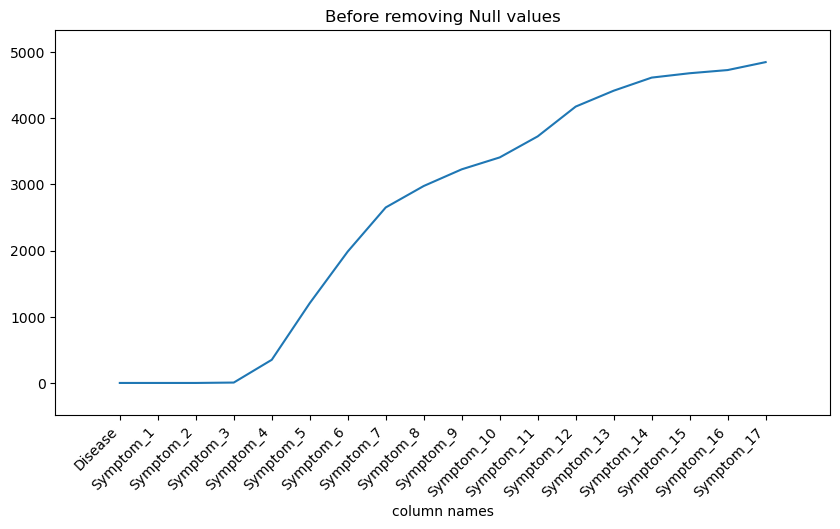

In [7]:
plt.figure(figsize=(10,5))
plt.plot(null_checker.index, null_checker['count'])
plt.xticks(null_checker.index, null_checker.index, rotation=45,
horizontalalignment='right')
plt.title('Before removing Null values')
plt.xlabel('column names')
plt.margins(0.1)
plt.show()

Remove the trailing space

In [8]:
cols = df.columns
data = df[cols].values.flatten()

s = pd.Series(data)
s = s.str.strip()
s = s.values.reshape(df.shape)

df = pd.DataFrame(s, columns=df.columns)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,skin rash,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Acne,skin rash,pus filled pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Hyperthyroidism,fatigue,mood swings,weight loss,restlessness,sweating,diarrhoea,fast heart rate,excessive hunger,muscle weakness,irritability,abnormal menstruation,NaN,NaN,NaN,NaN,NaN,NaN
3,AIDS,muscle wasting,patches in throat,high fever,extra marital contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Chronic cholestasis,itching,vomiting,yellowish skin,nausea,loss of appetite,abdominal pain,yellowing of eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Fill the NaN values with zero

In [9]:
df = df.fillna(0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,skin rash,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Acne,skin rash,pus filled pimples,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hyperthyroidism,fatigue,mood swings,weight loss,restlessness,sweating,diarrhoea,fast heart rate,excessive hunger,muscle weakness,irritability,abnormal menstruation,0,0,0,0,0,0
3,AIDS,muscle wasting,patches in throat,high fever,extra marital contacts,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Chronic cholestasis,itching,vomiting,yellowish skin,nausea,loss of appetite,abdominal pain,yellowing of eyes,0,0,0,0,0,0,0,0,0,0


Symptom severity rank

In [10]:
df1 = pd.read_csv('Symptom-severity.csv')
df1['Symptom'] = df1['Symptom'].str.replace('_',' ')
df1.head()

,Symptom,weight
0,itching,1
1,skin rash,3
2,nodal skin eruptions,4
3,continuous sneezing,4
4,shivering,5


Get overall list of symptoms

In [11]:
df1['Symptom'].unique()

array(['itching', 'skin rash', 'nodal skin eruptions',
       'continuous sneezing', 'shivering', 'chills', 'joint pain',
       'stomach pain', 'acidity', 'ulcers on tongue', 'muscle wasting',
       'vomiting', 'burning micturition', 'spotting urination', 'fatigue',
       'weight gain', 'anxiety', 'cold hands and feets', 'mood swings',
       'weight loss', 'restlessness', 'lethargy', 'patches in throat',
       'irregular sugar level', 'cough', 'high fever', 'sunken eyes',
       'breathlessness', 'sweating', 'dehydration', 'indigestion',
       'headache', 'yellowish skin', 'dark urine', 'nausea',
       'loss of appetite', 'pain behind the eyes', 'back pain',
       'constipation', 'abdominal pain', 'diarrhoea', 'mild fever',
       'yellow urine', 'yellowing of eyes', 'acute liver failure',
       'fluid overload', 'swelling of stomach', 'swelled lymph nodes',
       'malaise', 'blurred and distorted vision', 'phlegm',
       'throat irritation', 'redness of eyes', 'sinus pressu

Encode symptoms with the symptom rank

In [12]:
vals = df.values
symptoms = df1['Symptom'].unique()

for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = df1[df1['Symptom'] == symptoms[i]]['weight'].values[0]
    
d = pd.DataFrame(vals, columns=cols)
d.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,3,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Acne,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hyperthyroidism,4,3,3,5,3,6,5,4,2,2,6,0,0,0,0,0,0
3,AIDS,3,6,7,5,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Chronic cholestasis,1,5,3,5,4,4,4,0,0,0,0,0,0,0,0,0,0


Symptoms with no rank = zero

In [13]:
d = d.replace('dischromic  patches', 0)
d = d.replace('spotting  urination',0)
df = d.replace('foul smell of urine',0)
df.head(10)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,3,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Acne,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hyperthyroidism,4,3,3,5,3,6,5,4,2,2,6,0,0,0,0,0,0
3,AIDS,3,6,7,5,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Chronic cholestasis,1,5,3,5,4,4,4,0,0,0,0,0,0,0,0,0,0
5,Hypertension,3,7,4,4,3,0,0,0,0,0,0,0,0,0,0,0,0
6,Hypoglycemia,5,4,4,3,3,5,5,4,4,4,2,4,0,0,0,0,0
7,Arthritis,2,4,5,2,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Hepatitis B,1,4,2,3,4,4,4,4,4,6,5,2,0,0,0,0,0
9,Migraine,3,5,3,5,4,4,3,2,3,0,0,0,0,0,0,0,0


Drop the columns with zero values

In [14]:
null_checker = df.apply(lambda x: sum(x.isnull())).to_frame(name='count')
print(null_checker)

            count
Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4       0
Symptom_5       0
Symptom_6       0
Symptom_7       0
Symptom_8       0
Symptom_9       0
Symptom_10      0
Symptom_11      0
Symptom_12      0
Symptom_13      0
Symptom_14      0
Symptom_15      0
Symptom_16      0
Symptom_17      0


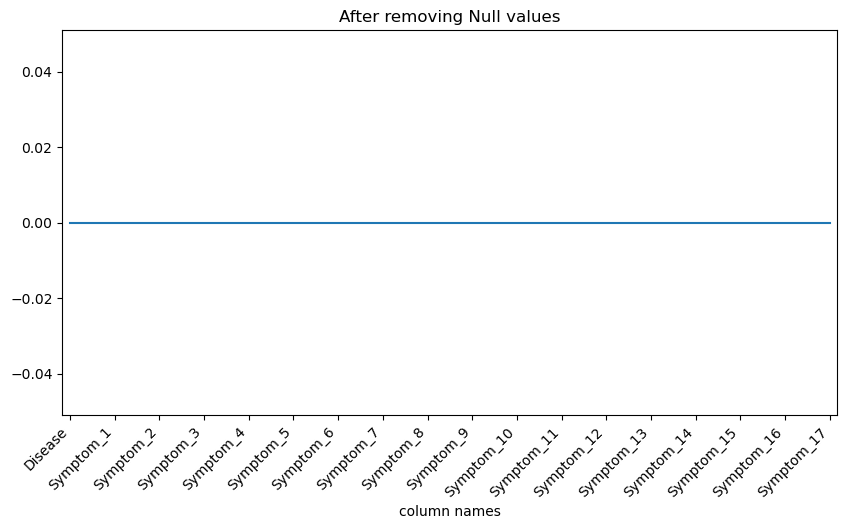

In [15]:
plt.figure(figsize=(10,5))
plt.plot(null_checker.index, null_checker['count'])
plt.xticks(null_checker.index, null_checker.index, rotation=45,
horizontalalignment='right')
plt.title('After removing Null values')
plt.xlabel('column names')
plt.margins(0.01)
plt.show()

In [16]:
print("Number of symptoms used to identify the disease ",len(df1['Symptom'].unique()))
print("Number of diseases that can be identified ",len(df['Disease'].unique()))

Number of symptoms used to identify the disease  131
Number of diseases that can be identified  41


Get the names of diseases 

In [18]:
df['Disease'].unique()

array(['Acne', 'Hyperthyroidism', 'AIDS', 'Chronic cholestasis',
       'Hypertension', 'Hypoglycemia', 'Arthritis', 'Hepatitis B',
       'Migraine', 'Urinary tract infection', 'Diabetes', 'Hepatitis D',
       'Psoriasis', 'Alcoholic hepatitis', 'Dimorphic hemmorhoids(piles)',
       'Hepatitis E', 'Cervical spondylosis', 'Bronchial Asthma',
       'hepatitis A', 'Allergy', 'Hepatitis C', 'Pneumonia',
       'Hypothyroidism', 'Gastroenteritis', 'Varicose veins', 'Jaundice',
       'Drug Reaction', '(vertigo) Paroymsal  Positional Vertigo',
       'Heart attack', 'Tuberculosis', 'Typhoid', 'Common Cold',
       'Peptic ulcer diseae', 'Paralysis (brain hemorrhage)',
       'Fungal infection', 'Impetigo', 'GERD', 'Dengue', 'Malaria',
       'Chicken pox', 'Osteoarthristis'], dtype=object)

Features -> Symptoms column ,Label ->Disease column

In [19]:
data = df.iloc[:,1:].values
labels = df['Disease'].values

Splitting the dataset to training (80%) and testing (20%)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, train_size = 0.8,random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3936, 17) (984, 17) (3936,) (984,)


Model Building

Naive Bayes Model

F1-score% = 86.58357842139314 | Accuracy% = 87.70325203252033


<Axes: >

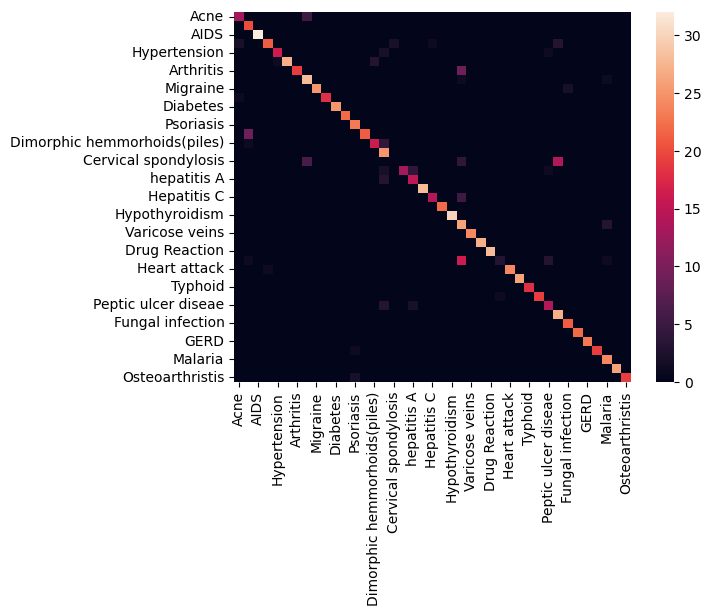

In [22]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
preds=gaussian.predict(x_test)
conf_mat = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)
sns.heatmap(df_cm)

In [23]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
gaussian_train =cross_val_score(gaussian, x_train, y_train, cv=kfold, scoring='accuracy')
pd.DataFrame(gaussian_train,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (gaussian_train.mean()*100.0, gaussian_train.std()*100.0))

Mean Accuracy: 86.840%, Standard Deviation: (1.65%)


In [24]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
gaussian_test =cross_val_score(gaussian, x_test, y_test, cv=kfold, scoring='accuracy')
pd.DataFrame(gaussian_test,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (gaussian_test.mean()*100.0, gaussian_test.std()*100.0))

Mean Accuracy: 85.666%, Standard Deviation: (1.77%)


Decision Tree

F1-score% = 95.7812664665753 | Accuracy% = 95.83333333333334


<Axes: >

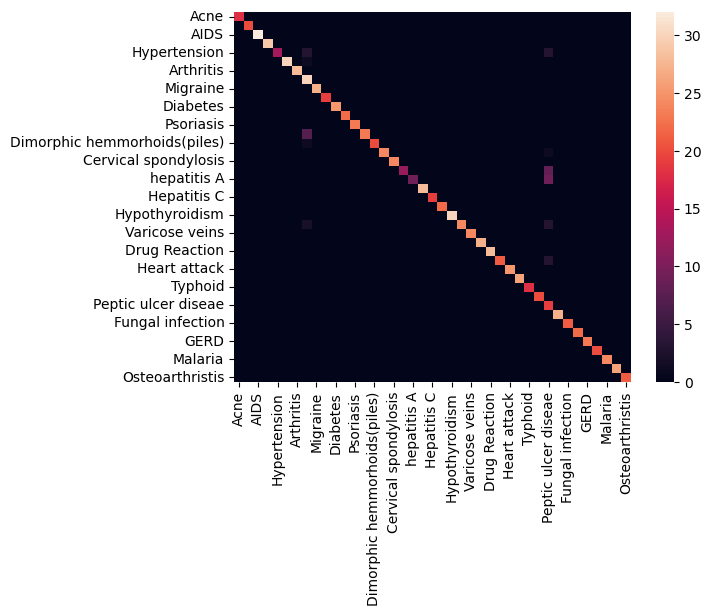

In [25]:
tree =DecisionTreeClassifier(criterion='gini',random_state=42,max_depth=13)
tree.fit(x_train, y_train)
preds=tree.predict(x_test)
conf_mat = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)
sns.heatmap(df_cm)

In [26]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
DS_train =cross_val_score(tree, x_train, y_train, cv=kfold, scoring='accuracy')
pd.DataFrame(DS_train,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (DS_train.mean()*100.0, DS_train.std()*100.0))

Mean Accuracy: 95.706%, Standard Deviation: (1.99%)


In [27]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
DS_test =cross_val_score(tree, x_test, y_test, cv=kfold, scoring='accuracy')
pd.DataFrame(DS_test,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (DS_test.mean()*100.0, DS_test.std()*100.0))

Mean Accuracy: 94.198%, Standard Deviation: (3.57%)


Random Forest

In [28]:
rfc=RandomForestClassifier(random_state=42)

F1-score% = 99.58380389536958 | Accuracy% = 99.59349593495935


<Axes: >

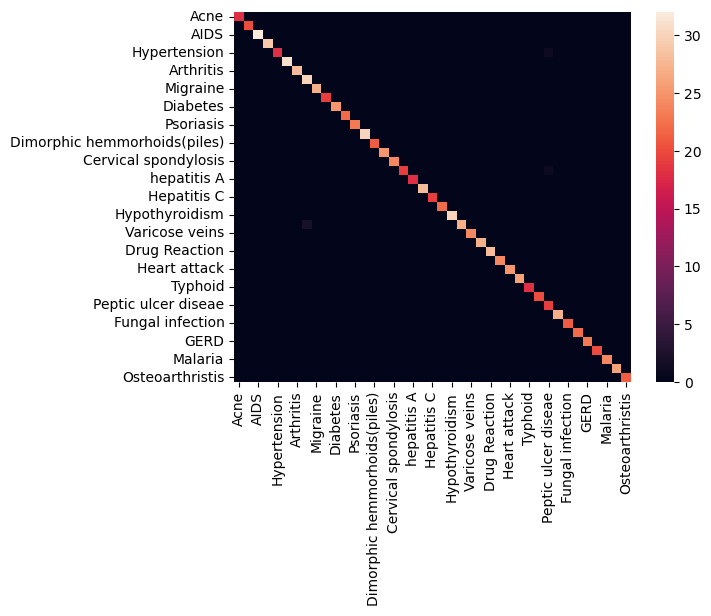

In [29]:
rnd_forest = RandomForestClassifier(random_state=42, max_features='sqrt', n_estimators= 500, max_depth=13)
rnd_forest.fit(x_train,y_train)
preds=rnd_forest.predict(x_test)
conf_mat = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)
sns.heatmap(df_cm)

In [30]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
rnd_forest_train =cross_val_score(rnd_forest, x_train, y_train, cv=kfold, scoring='accuracy')
pd.DataFrame(rnd_forest_train,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (rnd_forest_train.mean()*100.0, rnd_forest_train.std()*100.0))

Mean Accuracy: 99.187%, Standard Deviation: (0.44%)


In [31]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
rnd_forest_test =cross_val_score(rnd_forest, x_test, y_test, cv=kfold, scoring='accuracy')
pd.DataFrame(rnd_forest_test,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (rnd_forest_test.mean()*100.0, rnd_forest_test.std()*100.0))

Mean Accuracy: 98.575%, Standard Deviation: (1.31%)


Test the models

In [32]:
def predd(S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,x):
    psymptoms = [S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17]
    print(psymptoms)
    a = np.array(df1["Symptom"])
    b = np.array(df1["weight"])
    for j in range(len(psymptoms)):
        for k in range(len(a)):
            if psymptoms[j]==a[k]:
                psymptoms[j]=b[k]

    psy = [psymptoms]

    pred2 = x.predict(psy)
    print("The prediction is",pred2[0])

In [33]:
sympList=df1["Symptom"].to_list()
predd(sympList[7],sympList[5],sympList[2],sympList[80],0,0,0,0,0,0,0,0,0,0,0,0,0,rnd_forest)

['stomach pain', 'chills', 'nodal skin eruptions', 'muscle weakness', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The prediction is Paralysis (brain hemorrhage)


In [38]:
sympList=df1["Symptom"].to_list()
predd(sympList[8],sympList[1],sympList[2],sympList[80],0,0,0,0,0,0,0,0,0,0,0,0,0,tree)

['acidity', 'skin rash', 'nodal skin eruptions', 'muscle weakness', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The prediction is Paralysis (brain hemorrhage)


In [39]:
sympList=df1["Symptom"].to_list()
predd(sympList[8],sympList[1],sympList[2],sympList[80],0,0,0,0,0,0,0,0,0,0,0,0,0,gaussian)

['acidity', 'skin rash', 'nodal skin eruptions', 'muscle weakness', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The prediction is Paralysis (brain hemorrhage)


Comparison between algorithms testing and training

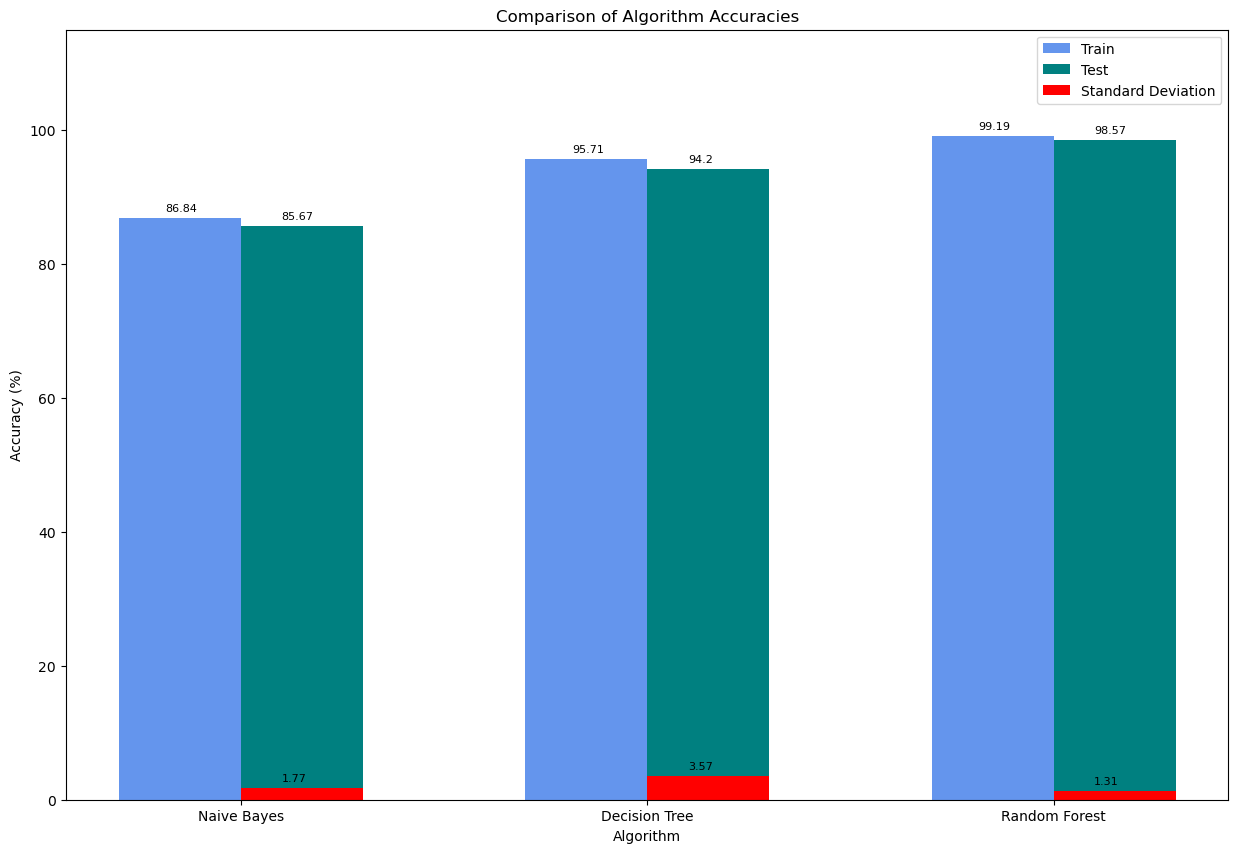

In [34]:
n_groups = 3
algorithms = ('Naive Bayes', 'Decision Tree', 'Random Forest')
train_accuracy = (gaussian_train.mean()*100.0, 
                 DS_train.mean()*100.0,
                 rnd_forest_train.mean()*100.0,
                 )


test_accuracy = (gaussian_test.mean()*100.0, 
                 DS_test.mean()*100.0,
                 rnd_forest_test.mean()*100.0
                )

Standard_Deviation=(gaussian_test.std()*100.0, 
                 DS_test.std()*100.0,     
                 rnd_forest_test.std()*100.0
                 
                   )

# create plot
fig, ax = plt.subplots(figsize=(15, 10))
index = np.arange(n_groups)
bar_width = 0.3
opacity = 1
rects1 = plt.bar(index, train_accuracy, bar_width, alpha = opacity, color='Cornflowerblue', label='Train')
rects2 = plt.bar(index + bar_width, test_accuracy, bar_width, alpha = opacity, color='Teal', label='Test')
rects3 = plt.bar(index + bar_width, Standard_Deviation, bar_width, alpha = opacity, color='red', label='Standard Deviation')
plt.xlabel('Algorithm') # x axis label
plt.ylabel('Accuracy (%)') # y axis label
plt.ylim(0, 115)
plt.title('Comparison of Algorithm Accuracies') # plot title
plt.xticks(index + bar_width * 0.5, algorithms) # x axis data labels
plt.legend(loc = 'upper right') # show legend
for index, data in enumerate(train_accuracy):
    plt.text(x = index - 0.035, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 8))
for index, data in enumerate(test_accuracy):
    plt.text(x = index + 0.25, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 8))
for index, data in enumerate(Standard_Deviation):
    plt.text(x = index + 0.25, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 8)) 